In [1]:
%matplotlib inline

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from subprocess import check_output
print(check_output(["ls", "./input"]).decode("utf8"))

from pylab import rcParams
rcParams['figure.figsize'] = (6, 6)      # setting default size of plots

/usr/local/lib/python3.4/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/usr/local/lib/python3.4/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


MetObjects.csv
Video_Games_Sales_as_at_30_Nov_2016.csv
digit.tar.gz
leaf_data.tar.gz
leaf_images.tar.gz



In [216]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

train = pd.read_csv('./input/train.csv')
test = pd.read_csv('./input/test.csv')
X_train = train.drop(['species', 'id'], axis=1) 
le = LabelEncoder().fit(train['species']) 
y_train = le.transform(train['species']) 

X_test = test.drop(['id'], axis=1)
test_ids = test.pop('id') #Id column for submission file

print(X_train.shape)
print(X_test.shape)


(990, 192)
(594, 192)


In [217]:
#from sklearn.decomposition import PCA

#pca = PCA(n_components=120)
#X_train = pca.fit_transform(X_train)
#print(X_train.shape)

In [429]:
from skimage import data, io
from PIL import Image
from skimage import measure
from skimage.feature import corner_harris, corner_subpix, corner_peaks

contours = []
corners = []

for i in range(1,991): 
    fname = './input/images/'+ str(i) + '.jpg'
    im=Image.open(fname)
    contour = measure.find_contours(im, 0.4)
    contours.append(len(contour))
    corner = corner_peaks(corner_harris(im), min_distance=5)
    corners.append(len(corner))
    
print(len(contour))

train['contour'] = contours
train['corner'] = corners
#print(contour)
#print(corners)

scaler.fit(X_train)
X_train = scaler.transform(X_train)

184


In [437]:
from sklearn.svm import SVC, NuSVC

classifier = SVC(kernel='linear', C=0.1,coef0=1, probability=True,random_state=101)
#classifier = NuSVC(nu=0.1,gamma=10, probability=True,random_state=101)
classifier.fit(X_train, y_train)

#y_pred = classifier.predict(X_test)
y_pred = classifier.predict_proba(X_train)
#print(y_pred)
#print(classifier.n_support_)
#print(classifier.support_vectors_)
#print(classifier.support_)

In [438]:
#check log loss
from sklearn.metrics import log_loss, accuracy_score
#labels = LabelEncoder().fit(train['species'])
y_pred_prob = classifier.predict_proba(X_train)
y_pred = classifier.predict(X_train)

print("Log loss: %0.4f" % log_loss(y_train, y_pred_prob))
print("Accuracy: %0.4f" % accuracy_score(y_train, y_pred))
#best: 1.80042
#Log loss: 2.0623, 2.0455,0.1996
#Accuracy: 0.9576,0.9636

Log loss: 1.9914
Accuracy: 1.0000


In [439]:
from sklearn import cross_validation
import numpy as np
scores = cross_validation.cross_val_score(classifier, X_train, y_train, cv=5)
print("score: ", np.mean(scores))

score:  0.989898989899


In [433]:
from sklearn.grid_search import GridSearchCV
params = {"kernel": ("rbf", "linear"), "C": [0.1, 0.3, 1, 3, 10, 30, 100,300]}
#params = {"kernel": ("rbf", "linear"),"nu":[0.1,0.2,0.4,0.6,0.8,0.9], "gamma": [0.1, 0.3, 1, 3, 10, 30, 100,300]}
clf = GridSearchCV(classifier, params, cv=5)
clf.fit(X_train, y_train)
print("Best parameters: " + str(clf.best_params_))

Best parameters: {'kernel': 'linear', 'C': 0.1}


In [440]:
print(clf.best_score_)
print(clf.best_estimator_)

0.989898989899
SVC(C=0.1, cache_size=200, class_weight=None, coef0=1, degree=3, gamma=0.0,
  kernel='linear', max_iter=-1, probability=True, random_state=101,
  shrinking=True, tol=0.001, verbose=False)


In [441]:
print(X_test.shape)

y_pred = classifier.predict_proba(X_test)
submission = pd.DataFrame(y_pred, index=test_ids, columns=le.classes_) 
#print (submission.head(4))
submission.to_csv('submission_leaf_classification_SVC.csv') 

(594, 192)


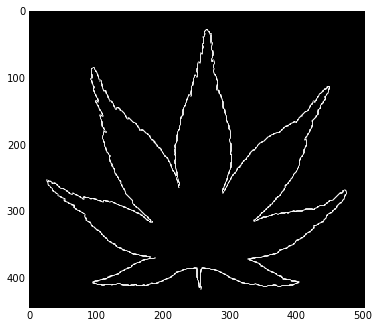

(443, 502) 222386
11255
<_io.BufferedReader name='./input/images/324.jpg'>


In [108]:
# read images
from PIL import Image
import glob
from skimage import data, io
#from skimage.feature import canny
from skimage.filter import sobel
fname='./input/images/324.jpg'
im=Image.open(fname)

#edges = canny(im)
edges = sobel(im)
io.imshow(edges)
io.show()

print(edges.shape, edges.shape[0] * edges.shape[1])
import numpy as np
print(np.count_nonzero(edges))

from skimage import io

f = open(fname, 'rb')
print(f)

1005


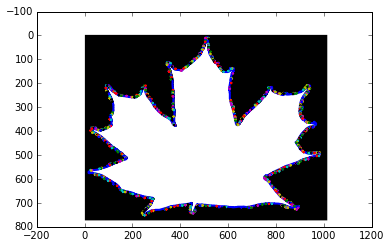

In [109]:
from skimage import measure

fname='./input/images/322.jpg'
im=Image.open(fname)

contours = measure.find_contours(im, 0.4)
import matplotlib.pyplot as plt
#print(contours)
fig, ax = plt.subplots()
print(len(contours))
ax.imshow(im, interpolation='nearest', cmap=plt.cm.gray)

for n, contour in enumerate(contours):
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

In [110]:
contour = []
for i in range(1,1585): 
    fname = './input/images/'+ str(i) + '.jpg'
    im=Image.open(fname)
    contours = measure.find_contours(im, 0.4)
    contour.append(len(contours))
    


In [111]:
len(contour)

1584

169 (64, 2) (64, 2)


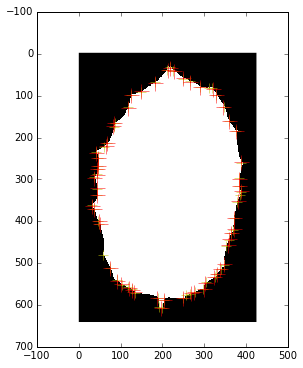

In [155]:
from skimage.feature import corner_harris, corner_subpix, corner_peaks


fname = './input/images/142.jpg'
im=Image.open(fname)
    
contours = measure.find_contours(im, 0.4)
coords = corner_peaks(corner_harris(im), min_distance=5)
coords_subpix = corner_subpix(im, coords, window_size=13)

print (len(contours),coords.shape,coords_subpix.shape)
fig, ax = plt.subplots()
ax.imshow(im, interpolation='nearest', cmap=plt.cm.gray)
ax.plot(coords[:, 1], coords[:, 0], '+y', markersize=10)
ax.plot(coords_subpix[:, 1], coords_subpix[:, 0], '+r', markersize=15)
#ax.axis((0, 350, 350, 0))
plt.show()

In [427]:
import pandas as pd
import numpy as np

from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.grid_search import GridSearchCV

train = pd.read_csv('./input/train.csv')
test = pd.read_csv('./input/test.csv')

le = LabelEncoder()
le.fit(train.species)

scaler = StandardScaler()

X_train = train.drop(["id", "species"], axis=1).as_matrix()
y_train = le.transform(train.species)
X_test = test.drop(["id"], axis=1).as_matrix()

scaler.fit(X_train)
X_train = scaler.transform(X_train)

print("Training model...")
params = {"kernel": ("rbf", "linear"), "C": [0.1, 0.3, 1, 3, 10, 30, 100]}
svm = SVC()
clf = GridSearchCV(svm, params, cv=5)
clf.fit(X_train, y_train)

print("Best parameters: " + str(clf.best_params_))
for params, mean_score, scores in clf.grid_scores_:
    print("%0.3f (+/-%0.03f) for %r" % (mean_score, scores.std(), params))
    print(scores)

print("Predicting test set...")
results = clf.predict(scaler.transform(X_test))
r = np.zeros([len(X_test), len(le.classes_)])

for i, v in enumerate(results):
    r[i, v] = 1

submit = pd.DataFrame(r, index=test.id, columns=le.classes_)
submit.to_csv('submit.csv')

Training model...
Best parameters: {'kernel': 'linear', 'C': 0.1}
0.978 (+/-0.008) for {'kernel': 'rbf', 'C': 0.1}
[ 0.96969697  0.98484848  0.96969697  0.97474747  0.98989899]
0.990 (+/-0.006) for {'kernel': 'linear', 'C': 0.1}
[ 0.98989899  0.98989899  0.97979798  0.98989899  1.        ]
0.979 (+/-0.009) for {'kernel': 'rbf', 'C': 0.3}
[ 0.96969697  0.98989899  0.96969697  0.97474747  0.98989899]
0.990 (+/-0.006) for {'kernel': 'linear', 'C': 0.3}
[ 0.98989899  0.98989899  0.97979798  0.98989899  1.        ]
0.987 (+/-0.008) for {'kernel': 'rbf', 'C': 1}
[ 0.98484848  0.98484848  0.97474747  0.98989899  1.        ]
0.990 (+/-0.006) for {'kernel': 'linear', 'C': 1}
[ 0.98989899  0.98989899  0.97979798  0.98989899  1.        ]
0.990 (+/-0.007) for {'kernel': 'rbf', 'C': 3}
[ 0.98989899  0.98484848  0.97979798  0.99494949  1.        ]
0.990 (+/-0.006) for {'kernel': 'linear', 'C': 3}
[ 0.98989899  0.98989899  0.97979798  0.98989899  1.        ]
0.989 (+/-0.007) for {'kernel': 'rbf', 'C'